In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("./data/df1_loan.csv")
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [20]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [21]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [22]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    69.0
N    31.0
Name: proportion, dtype: float64

In [23]:
df= df.rename(columns = {'Unnamed: 0':'Loan_amount'})

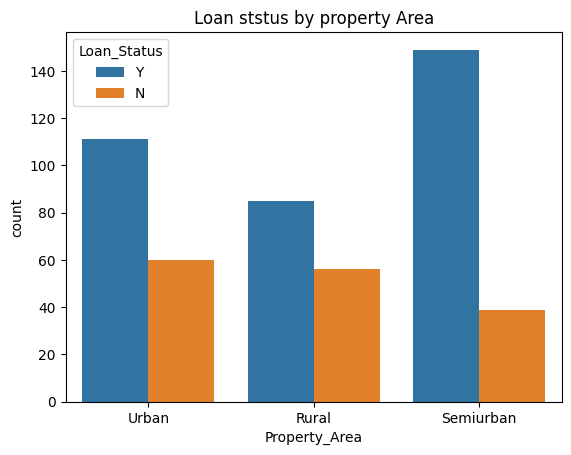

In [24]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Loan ststus by property Area")
plt.show()

In [25]:
big_loan = df[df['LoanAmount'] > 200]
approval_rate_big = (big_loan['Loan_Status'] == 'Y').mean()*100
approval_rate_big

np.float64(54.23728813559322)

In [26]:
np.std(df['LoanAmount'].dropna())

np.float64(82.2594543309646)

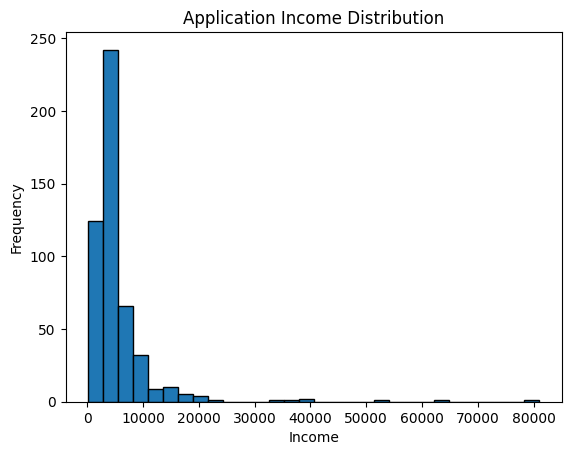

In [27]:
plt.hist(df['ApplicantIncome'], bins=30, edgecolor='black')
plt.title("Application Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [40]:
# Remove $ and commas, convert to float
df['Total_Income'] = (
    df['Total_Income']
    .astype(str)
    .replace('[\$,]', '', regex=True)  # remove dollar signs and commas
    .astype(float)
)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\srmpc\AppData\Local\Temp\ipykernel_36484\2117115373.py:5: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # remove dollar signs and commas


In [ ]:
Total_Income = df['ApplicantIncome'] + df['CoapplicantIncome']
df[['ApplicantIncome','CoapplicantIncome','Total_Income']].head()

,ApplicantIncome,CoapplicantIncome,Total_Income
0,5849,0.0,$5849.0
1,4583,1508.0,$6091.0
2,3000,0.0,$3000.0
3,2583,2358.0,$4941.0
4,6000,0.0,$6000.0


In [33]:
df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()*100

Loan_Status,N,Y
Gender,,
Female,34.065934,65.934066
Male,30.250000,69.750000


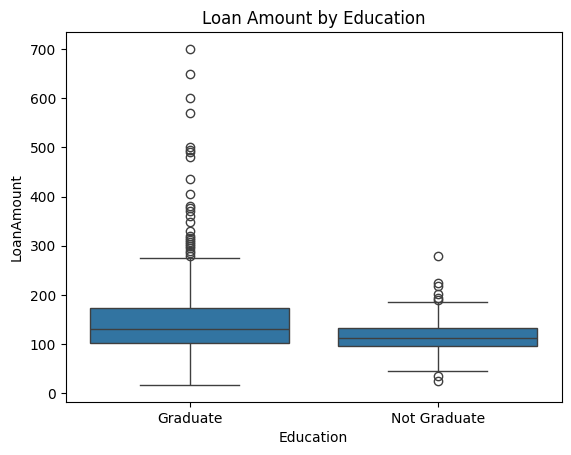

In [34]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title("Loan Amount by Education")
plt.show()

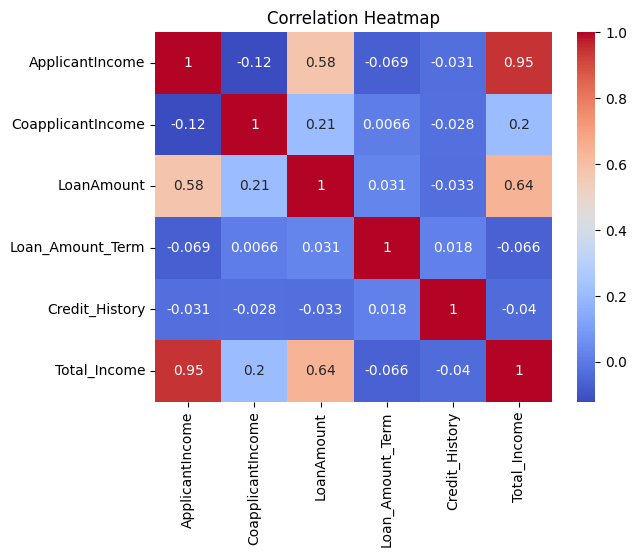

In [41]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Total_Income']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [42]:
df.groupby('Credit_History')['LoanAmount'].mean()

Credit_History
0.0    149.318841
1.0    142.008043
Name: LoanAmount, dtype: float64

In [44]:
df['Dependents'].value_counts()

Dependents
0     288
1      81
2      79
3+     40
Name: count, dtype: int64

In [46]:
df['Income_to_Loan_Ratio'] = df['Total_Income']/df['LoanAmount']
df[['Total_Income','LoanAmount','Income_to_Loan_Ratio']].head()

,Total_Income,LoanAmount,Income_to_Loan_Ratio
0,5849.0,NaN,NaN
1,6091.0,128.0,47.585938
2,3000.0,66.0,45.454545
3,4941.0,120.0,41.175000
4,6000.0,141.0,42.553191


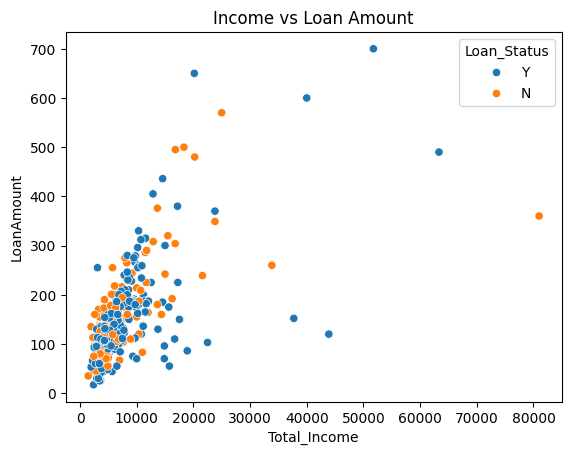

In [ ]:
sns.scatterplot(x='Total_Income', y='LoanAmount', hue='Loan_Status', data=df)
plt.title("Income vs Loan Amount")
plt.show()